In [2]:
import tensorflow as tf

In [3]:
# 타이타닉을 같이 한번 만들어봐
import pandas as pd
# data loading (train data set loading)

train_df = pd.read_csv('./titanic/train.csv')
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 총 몇 행 몇열 잇는지 확인
#train_df.shape

# 이렇게 해서 결측치가 얼마 잇는지 확인????
train_df.info() # each col feature
train_df.isnull().sum(axis=0)

# 결측치와 이상치 찾아서 적절한 값 변경하던가
# 아니면 삭제하던가 처리 해야 함 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

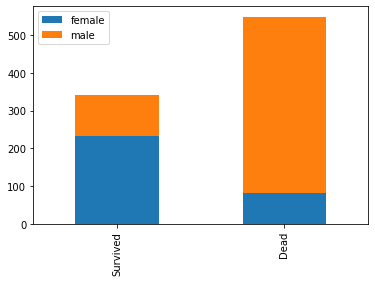

In [5]:
# 어떤 feature가 생존여부 영향을 미치는 지 확인
# 그래프 확인 해 보아요
# 파이차트나 누적비차트 많이 이용? 
# 성별이 생존여부에 영향을 미치는지 확인!
# 생존한 사람의 성별에 따른 사람수를 구해봐

survived = train_df.loc[train_df["Survived"] == 1]["Sex"].value_counts()
survived.name = "Survived"
survived
# 사망한 사람의 성별에 따른 사람수 를 구해봐

dead = train_df.loc[train_df["Survived"] == 0]["Sex"].value_counts()
dead.name = "Dead"
dead

# 그래프를 그리기 위해 데이터 프레임 만들어봐!
sex_df = pd.DataFrame([survived, dead])
sex_df

# stacked 누적 그래프를 만들어봐? 
sex_df.plot(kind = "bar", stacked=True)

# 성별은 많은 영향을 준다 

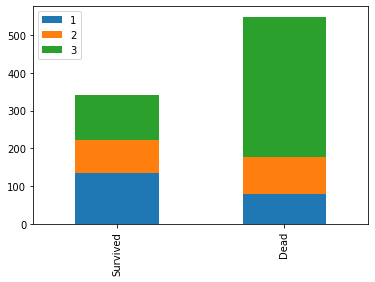

In [6]:
# Pclass 생존여부 미치는 영향 확인
# 생존한 사람의 클라스에 따른 사람수 구함

survived = train_df.loc[train_df["Survived"] == 1]["Pclass"].value_counts()
survived.name = "Survived"
survived
# 사망한 사람의 클라스에 따른 사람수 를 구해봐

dead = train_df.loc[train_df["Survived"] == 0]["Pclass"].value_counts()
dead.name = "Dead"
dead

# 그래프를 그리기 위해 데이터 프레임 만들어봐!
pclass_df = pd.DataFrame([survived, dead])
pclass_df

# stacked 누적 그래프를 만들어봐? 
pclass_df.plot(kind = "bar", stacked=True)


In [7]:
# 다 귀찬으니 메소드를 만들자 

def stackedBarChart(feature):
    survived = train_df.loc[train_df["Survived"] == 1][feature].value_counts()
    survived.name = "Survived"
#survived
# 사망한 사람의 클라스에 따른 사람수 를 구해봐

    dead = train_df.loc[train_df["Survived"] == 0][feature].value_counts()
    dead.name = "Dead"
#dead

# 그래프를 그리기 위해 데이터 프레임 만들어봐!
    pclass_df = pd.DataFrame([survived, dead])
#pclass_df

# stacked 누적 그래프를 만들어봐? 
    pclass_df.plot(kind = "bar", stacked=True)

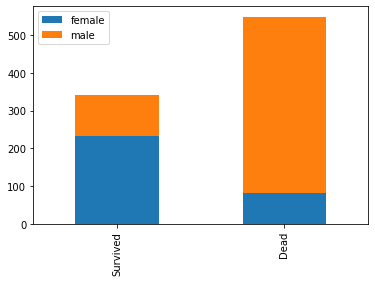

In [9]:
stackedBarChart("Sex")

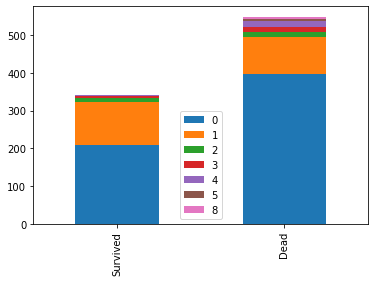

In [10]:
stackedBarChart("SibSp")

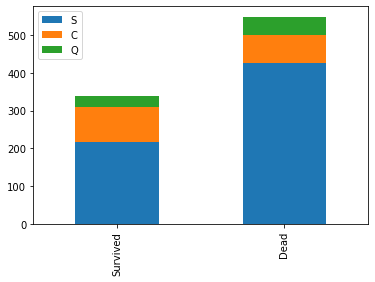

In [106]:
stackedBarChart("Embarked")

In [14]:
# 피쳐 엔지니어링
# 피쳐: 행
train_df.head()

# text 로 되어있는 부분은 머신러닝 하기 힘들어요!
# 텍스트로 되어있는 부분은 적절한 스켕일로 숫자 변환
# NaN 결측치는 삭제하는 것보다 적절한 값으로 대체




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# 제일 먼저 해결해야 하는 피쳐는 네임
# 네임은 그 자체로는 크게 의미가 없어보지만 이름의 특정
# 키워드 들어가 있고 이 키워드가 생존에 영향을 미칠 수 잇어요 

train_df["Title"] = train_df["Name"].str.extract("([A-Za-z]+)\.")

train_df["Title"].value_counts()

# Title 안에 Mr Miss Mrs other 각각 0 1 2 3으로 변환
title_mapping_dict = { "Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3,
"Major" : 3,
"Mlle"  : 3,
"Col"   : 3,
"Don"   : 3,
"Ms"    : 3,
"Capt"  : 3,
"Countess"  : 3,
"Jonkheer"  : 3,
"Sir" : 3,
"Lady" : 3,
"Mme" : 3}
#train_df["T"]

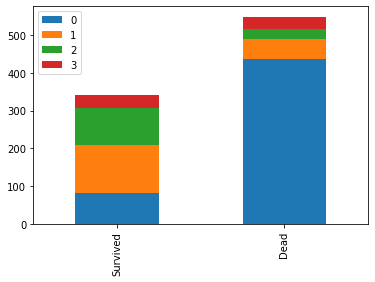

In [12]:
train_df["Title"] = train_df["Title"].map(title_mapping_dict)
stackedBarChart("Title")


In [13]:
# 이제는 필요없는 거 없애버려야 할 시간
train_df.drop("Name", axis = 1, inplace=True)
train_df.drop("Ticket", axis = 1, inplace=True)
train_df.drop("Cabin", axis = 1, inplace=True)
train_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,3
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,NaN,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [14]:
# 성별 컬럼 male -> 0 female -> 1
# 숫자로 변환 나중에 쉽게 트레이닝 시킬 수 잇도록?
sex_mapping_dict = {"male" : 0, "female" : 1}
train_df["Sex"] = train_df["Sex"].map(sex_mapping_dict)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S,3
887,888,1,1,1,19.0,0,0,30.0000,S,1
888,889,0,3,1,NaN,1,2,23.4500,S,1
889,890,1,1,0,26.0,0,0,30.0000,C,0


In [15]:
# embarked 요소에서 빈 값을 S 로 채워준다
# 근데 다른 블로그에서는 피클래스 대로 처리를 하는 십알 
train_df["Embarked"].fillna("S", inplace=True)
embarked_mapping_dict = {"S" : 0, "Q" : 1, "C" : 2}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping_dict)
train_df



# stackedBarChart("Embarked")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,2,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,3
887,888,1,1,1,19.0,0,0,30.0000,0,1
888,889,0,3,1,NaN,1,2,23.4500,0,1
889,890,1,1,0,26.0,0,0,30.0000,2,0


In [20]:
# age 에는 결측치가 많아요
# 결측치를 대체해서 넣어라
# - 전체사람의 평균 구해서 결측치를 채움
# - 타이틀를 이용해서 각 타이틀에 맞는 평균 나이로 결측치를 채워요 
new_train_df = train_df.copy()

# print(new_train_df)

#new_train_df["Age"].fillna()

age_mean = new_train_df.groupby("Title")["Age"].mean()
a = new_train_df[new_train_df["Title"] == 0]["Age"].fillna(age_mean[0])
b = new_train_df[new_train_df["Title"] == 1]["Age"].fillna(age_mean[1])
c = new_train_df[new_train_df["Title"] == 2]["Age"].fillna(age_mean[2])
d = new_train_df[new_train_df["Title"] == 3]["Age"].fillna(age_mean[3])

print(new_train_df)


     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.0      1      0   7.2500   
1              2         1       1    1  38.0      1      0  71.2833   
2              3         1       3    1  26.0      0      0   7.9250   
3              4         1       1    1  35.0      1      0  53.1000   
4              5         0       3    0  35.0      0      0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...      ...   
886          887         0       2    0  27.0      0      0  13.0000   
887          888         1       1    1  19.0      0      0  30.0000   
888          889         0       3    1   NaN      1      2  23.4500   
889          890         1       1    0  26.0      0      0  30.0000   
890          891         0       3    0  32.0      0      0   7.7500   

     Embarked  Title  
0           0      0  
1           2      2  
2           0      1  
3           0      2  
4           0      0

In [21]:
result_series = pd.concat([a,b,c,d])
new_train_df["Age"] = result_series.sort_index()
print(new_train_df)


     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.000000      1      0   7.2500   
1              2         1       1    1  38.000000      1      0  71.2833   
2              3         1       3    1  26.000000      0      0   7.9250   
3              4         1       1    1  35.000000      1      0  53.1000   
4              5         0       3    0  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    0  27.000000      0      0  13.0000   
887          888         1       1    1  19.000000      0      0  30.0000   
888          889         0       3    1  21.773973      1      2  23.4500   
889          890         1       1    0  26.000000      0      0  30.0000   
890          891         0       3    0  32.000000      0      0   7.7500   

     Embarked  Title  
0           0      0  
1           2      2  
2     

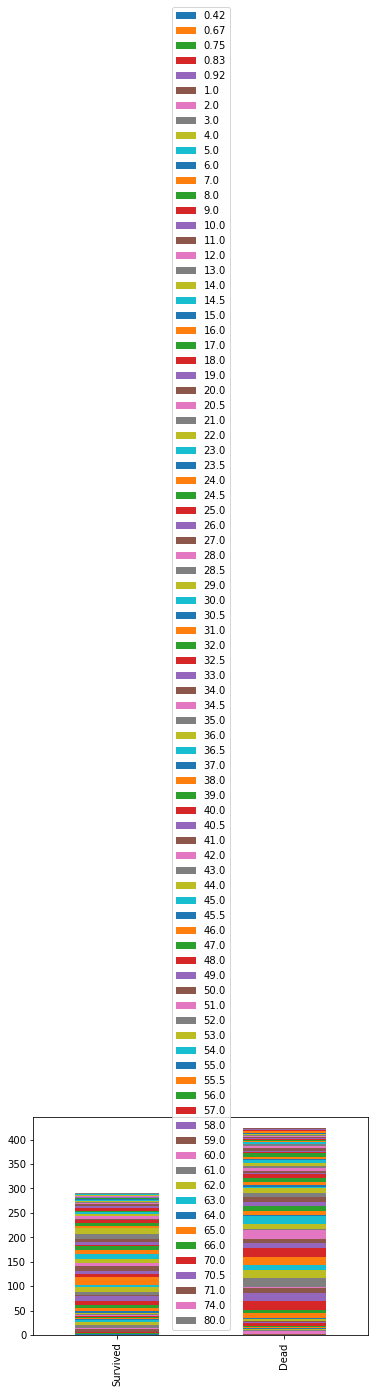

In [22]:
# Age에 대해서 비닝 처리
# Binning 처리 를 할 떄 고려해야 할 사항 -> 간격을 어떻게 설정?
# Age => 20살이하 : 0
# Age => 20살초과 ~ 40이하 : 1
# Age => 40살초과 ~ 60이하 : 2
# Age => 60살초과 : 3

new_train_df.loc[new_train_df["Age"] <= 20, "Age"] = 0
new_train_df.loc[(new_train_df["Age"] > 20) & (new_train_df["Age"] <= 40), "Age"] = 1
new_train_df.loc[(new_train_df["Age"] > 40) & (new_train_df["Age"] <= 60), "Age"] = 2
new_train_df.loc[new_train_df["Age"] > 60, "Age"] = 3



#print(new_train_df)

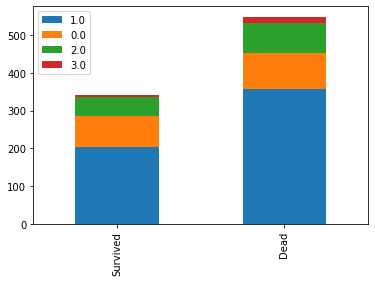

In [24]:
stackedBarChart2("Age", new_train_df)

In [25]:
# Fare에 대해 비닝 처리를 해봄?
# 한번 해봄
# 모든 전처리 끈나요

# 머신 러닝 으로 들어가요?

fare_mean = new_train_df.groupby("Pclass")["Fare"].mean()

print(fare_mean)

# a = new_train_df[new_train_df["Pclass"] == 1]["Fare"].fillna(fare_mean[0])
# b = new_train_df[new_train_df["Pclass"] == 2]["Fare"].fillna(fare_mean[1])
# c = new_train_df[new_train_df["Pclass"] == 3]["Fare"].fillna(fare_mean[2])
#d = new_train_df[new_train_df["Title"] == 3]["Age"].fillna(age_mean[3])


print(new_train_df)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  \
0              1         0       3    0  1.0      1      0   7.2500         0   
1              2         1       1    1  1.0      1      0  71.2833         2   
2              3         1       3    1  1.0      0      0   7.9250         0   
3              4         1       1    1  1.0      1      0  53.1000         0   
4              5         0       3    0  1.0      0      0   8.0500         0   
..           ...       ...     ...  ...  ...    ...    ...      ...       ...   
886          887         0       2    0  1.0      0      0  13.0000         0   
887          888         1       1    1  0.0      0      0  30.0000         0   
888          889         0       3    1  1.0      1      2  23.4500         0   
889          890         1       1    0  1.0      0      0  30.0000         2   
890          891         0    

In [26]:
# result_series_s = pd.concat([a,b,c])
# new_train_df["Fare"] = result_series_s.sort_index()

# print(new_train_df)

new_train_df2 = new_train_df.copy()
print(new_train_df)
print(new_train_df2)


     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  \
0              1         0       3    0  1.0      1      0   7.2500         0   
1              2         1       1    1  1.0      1      0  71.2833         2   
2              3         1       3    1  1.0      0      0   7.9250         0   
3              4         1       1    1  1.0      1      0  53.1000         0   
4              5         0       3    0  1.0      0      0   8.0500         0   
..           ...       ...     ...  ...  ...    ...    ...      ...       ...   
886          887         0       2    0  1.0      0      0  13.0000         0   
887          888         1       1    1  0.0      0      0  30.0000         0   
888          889         0       3    1  1.0      1      2  23.4500         0   
889          890         1       1    0  1.0      0      0  30.0000         2   
890          891         0       3    0  1.0      0      0   7.7500         1   

     Title  
0        0  
1

In [23]:
def stackedBarChart2(feature,df):
    survived = df.loc[df["Survived"] == 1][feature].value_counts()
    survived.name = "Survived"
#survived
# 사망한 사람의 클라스에 따른 사람수 를 구해봐

    dead = df.loc[df["Survived"] == 0][feature].value_counts()
    dead.name = "Dead"
#dead

# 그래프를 그리기 위해 데이터 프레임 만들어봐!
    pclass_df = pd.DataFrame([survived, dead])
#pclass_df

# stacked 누적 그래프를 만들어봐? 
    pclass_df.plot(kind = "bar", stacked=True)

In [31]:
#sum(new_train_df2['Fare'].isna())
#new_train_df2['Fare'].quan

#import numpy as np

new_train_df2['Fare'].describe()




count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
new_train_df2.loc[new_train_df2["Fare"] < 7.92, "Fare"] = 0
new_train_df2.loc[(new_train_df2["Fare"] >= 7.92) & (new_train_df2["Fare"] <= 14.45), "Fare"] = 1
new_train_df2.loc[(new_train_df2["Fare"] > 14.45) & (new_train_df2["Fare"] <= 31.00), "Fare"] = 2
new_train_df2.loc[(new_train_df2["Fare"] > 31.00), "Fare"] = 3

# new_train_df2['Fare'] = new_train_df2['Fare'].astype(int)

In [33]:
print(new_train_df2)
#stackedBarChart2("Fare", new_train_df2)

     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  \
0              1         0       3    0  1.0      1      0   0.0         0   
1              2         1       1    1  1.0      1      0   3.0         2   
2              3         1       3    1  1.0      0      0   1.0         0   
3              4         1       1    1  1.0      1      0   3.0         0   
4              5         0       3    0  1.0      0      0   1.0         0   
..           ...       ...     ...  ...  ...    ...    ...   ...       ...   
886          887         0       2    0  1.0      0      0   1.0         0   
887          888         1       1    1  0.0      0      0   2.0         0   
888          889         0       3    1  1.0      1      2   2.0         0   
889          890         1       1    0  1.0      0      0   2.0         2   
890          891         0       3    0  1.0      0      0   0.0         1   

     Title  
0        0  
1        2  
2        1  
3        2 

In [98]:
# print(train_df)

     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0              1         0       3    0  1.0      1      0   3.0         0      0
1              2         1       1    1  1.0      1      0   3.0         2      2
2              3         1       3    1  1.0      0      0   3.0         0      1
3              4         1       1    1  1.0      1      0   3.0         0      2
4              5         0       3    0  1.0      0      0   3.0         0      0
..           ...       ...     ...  ...  ...    ...    ...   ...       ...    ...
886          887         0       2    0  1.0      0      0   3.0         0      3
887          888         1       1    1  0.0      0      0   3.0         0      1
888          889         0       3    1  1.0      1      2   3.0         0      1
889          890         1       1    0  1.0      0      0   3.0         2      0
890          891         0       3    0  1.0      0      0   3.0         1      0

[891 rows x 10 

In [160]:
#Train test data set
#train_num = int(new_train_df2.shape[0])

new_train_df3 = new_train_df2.drop("PassengerId", axis=1, inplace=False)
print(new_train_df3)

train_x_data = new_train_df3.drop("Survived", axis=1, inplace=False).values
train_y_data = new_train_df3[["Survived"]].values.reshape(-1,1)

# tensorflow 이용한 로지스틱 리그레션 코드가 나와랏!
# 플레이스홀더
X = tf.placeholder(shape=[None,8], dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype = tf.float32)

# Weight
W = tf.Variable(tf.random_normal([8,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost(loss) function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))
                      
# train 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# session initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={ X : train_x_data,
                                                     Y : train_y_data})
    if step % 300 == 0:
        print("cost val: {}".format(cost_val))

# predict?
# We W와 b 구함 -> 모델 구성
# 정확도를 측정 
# 테스트용 입력데이터 (test_x_data)
# 이렇게 구한 예측값 과 y 입력데이터 (test_y_data)를 비굣!
# 에측값 실제데이터 차이를 비율 계산

predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print('정확도: {}'.format(sess.run(accuracy, 
                               feed_dict={ X : train_x_data,
                                           Y : train_y_data})))







     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0           0       3    0  1.0      1      0   0.0         0      0
1           1       1    1  1.0      1      0   3.0         2      2
2           1       3    1  1.0      0      0   1.0         0      1
3           1       1    1  1.0      1      0   3.0         0      2
4           0       3    0  1.0      0      0   1.0         0      0
..        ...     ...  ...  ...    ...    ...   ...       ...    ...
886         0       2    0  1.0      0      0   1.0         0      3
887         1       1    1  0.0      0      0   2.0         0      1
888         0       3    1  1.0      1      2   2.0         0      1
889         1       1    0  1.0      0      0   2.0         2      0
890         0       3    0  1.0      0      0   0.0         1      0

[891 rows x 9 columns]
cost val: 1.7794888019561768
cost val: 0.6148877143859863
cost val: 0.5441805720329285
cost val: 0.5080362558364868
cost val: 0.48571065068244934
co

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [172]:
# kaggle test.csv
# test.csv.를 이용해서 prediction
# 에측결과과 나와요 -> 파일을 만들어서 제출
# test csv 살펴보면 train.csv와 같음

# test.csv  어큐레이시 를 구할수 있는 형태로 feature engineering을 함 

test_df = pd.read_csv('./titanic/test.csv')

test_df["Title"] = test_df["Name"].str.extract("([A-Za-z]+)\.")

#print(test_df)

# = 

#print(new_train_df2)

In [173]:
print(test_df)

title_mapping_dict = { "Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3,
"Major" : 3,
"Mlle"  : 3,
"Col"   : 3,
"Don"   : 3,
"Ms"    : 3,
"Capt"  : 3,
"Countess"  : 3,
"Jonkheer"  : 3,
"Sir" : 3,
"Lady" : 3,
"Mme" : 3}

test_df["Title"] = test_df["Title"].map(title_mapping_dict)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0

In [174]:
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

print(test_df)



     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Title
0            892       3    male  34.5      0      0    7.8292        Q    0.0
1            893       3  female  47.0      1      0    7.0000        S    2.0
2            894       2    male  62.0      0      0    9.6875        Q    0.0
3            895       3    male  27.0      0      0    8.6625        S    0.0
4            896       3  female  22.0      1      1   12.2875        S    2.0
..           ...     ...     ...   ...    ...    ...       ...      ...    ...
413         1305       3    male   NaN      0      0    8.0500        S    0.0
414         1306       1  female  39.0      0      0  108.9000        C    NaN
415         1307       3    male  38.5      0      0    7.2500        S    0.0
416         1308       3    male   NaN      0      0    8.0500        S    0.0
417         1309       3    male   NaN      1      1   22.3583        C    3.0

[418 rows x 9 columns]


In [175]:
test_df["Title"].fillna(3, inplace = True)

# sex_mapping_dict = {"male" : 0, "female" : 1}

In [176]:
print(test_df)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Title
0            892       3    male  34.5      0      0    7.8292        Q    0.0
1            893       3  female  47.0      1      0    7.0000        S    2.0
2            894       2    male  62.0      0      0    9.6875        Q    0.0
3            895       3    male  27.0      0      0    8.6625        S    0.0
4            896       3  female  22.0      1      1   12.2875        S    2.0
..           ...     ...     ...   ...    ...    ...       ...      ...    ...
413         1305       3    male   NaN      0      0    8.0500        S    0.0
414         1306       1  female  39.0      0      0  108.9000        C    3.0
415         1307       3    male  38.5      0      0    7.2500        S    0.0
416         1308       3    male   NaN      0      0    8.0500        S    0.0
417         1309       3    male   NaN      1      1   22.3583        C    3.0

[418 rows x 9 columns]


In [177]:
print (test_df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print(test_df[test_df["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  94.280297
1       2  22.202104
2       3  12.459678
152    3
Name: Pclass, dtype: int64


In [178]:
# 성별 컬럼 male -> 0 female -> 1
# 숫자로 변환 나중에 쉽게 트레이닝 시킬 수 잇도록?

sex_mapping_dict = {"male" : 0, "female" : 1}
test_df["Sex"] = test_df["Sex"].map(sex_mapping_dict)

#print(test_df)

In [179]:
# embarked 요소에서 빈 값을 S 로 채워준다
# 근데 다른 블로그에서는 피클래스 대로 처리를 하는 십알
#print(test_df)

test_df["Embarked"].fillna("S", inplace=True)
embarked_mapping_dict = {"S" : 0, "Q" : 1, "C" : 2}
test_df["Embarked"] = test_df["Embarked"].map(embarked_mapping_dict)



In [180]:
test_df['Fare'] = test_df['Fare'].fillna(12.4596)
print(test_df)

     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Title
0            892       3    0  34.5      0      0    7.8292         1    0.0
1            893       3    1  47.0      1      0    7.0000         0    2.0
2            894       2    0  62.0      0      0    9.6875         1    0.0
3            895       3    0  27.0      0      0    8.6625         0    0.0
4            896       3    1  22.0      1      1   12.2875         0    2.0
..           ...     ...  ...   ...    ...    ...       ...       ...    ...
413         1305       3    0   NaN      0      0    8.0500         0    0.0
414         1306       1    1  39.0      0      0  108.9000         2    3.0
415         1307       3    0  38.5      0      0    7.2500         0    0.0
416         1308       3    0   NaN      0      0    8.0500         0    0.0
417         1309       3    0   NaN      1      1   22.3583         2    3.0

[418 rows x 9 columns]


In [181]:
#print(test_df)
# age 에는 결측치가 많아요
# 결측치를 대체해서 넣어라
# - 전체사람의 평균 구해서 결측치를 채움
# - 타이틀를 이용해서 각 타이틀에 맞는 평균 나이로 결측치를 채워요 

new_test_df = test_df.copy()

age_mean = new_test_df.groupby("Title")["Age"].mean()
a = new_test_df[new_test_df["Title"] == 0]["Age"].fillna(age_mean[0])
b = new_test_df[new_test_df["Title"] == 1]["Age"].fillna(age_mean[1])
c = new_test_df[new_test_df["Title"] == 2]["Age"].fillna(age_mean[2])
d = new_test_df[new_test_df["Title"] == 3]["Age"].fillna(age_mean[3])




In [182]:
print(new_test_df)

result_series_1 = pd.concat([a,b,c,d])
new_test_df["Age"] = result_series_1.sort_index()

     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Title
0            892       3    0  34.5      0      0    7.8292         1    0.0
1            893       3    1  47.0      1      0    7.0000         0    2.0
2            894       2    0  62.0      0      0    9.6875         1    0.0
3            895       3    0  27.0      0      0    8.6625         0    0.0
4            896       3    1  22.0      1      1   12.2875         0    2.0
..           ...     ...  ...   ...    ...    ...       ...       ...    ...
413         1305       3    0   NaN      0      0    8.0500         0    0.0
414         1306       1    1  39.0      0      0  108.9000         2    3.0
415         1307       3    0  38.5      0      0    7.2500         0    0.0
416         1308       3    0   NaN      0      0    8.0500         0    0.0
417         1309       3    0   NaN      1      1   22.3583         2    3.0

[418 rows x 9 columns]


In [183]:
print(new_test_df)

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  \
0            892       3    0  34.50000      0      0    7.8292         1   
1            893       3    1  47.00000      1      0    7.0000         0   
2            894       2    0  62.00000      0      0    9.6875         1   
3            895       3    0  27.00000      0      0    8.6625         0   
4            896       3    1  22.00000      1      1   12.2875         0   
..           ...     ...  ...       ...    ...    ...       ...       ...   
413         1305       3    0  32.00000      0      0    8.0500         0   
414         1306       1    1  39.00000      0      0  108.9000         2   
415         1307       3    0  38.50000      0      0    7.2500         0   
416         1308       3    0  32.00000      0      0    8.0500         0   
417         1309       3    0  16.90913      1      1   22.3583         2   

     Title  
0      0.0  
1      2.0  
2      0.0  
3      0.0  
4      2.0

In [184]:
#print(new_test_df)

# Age에 대해서 비닝 처리
# Binning 처리 를 할 떄 고려해야 할 사항 -> 간격을 어떻게 설정?
# Age => 20살이하 : 0
# Age => 20살초과 ~ 40이하 : 1
# Age => 40살초과 ~ 60이하 : 2
# Age => 60살초과 : 3

new_test_df.loc[new_test_df["Age"] <= 20, "Age"] = 0
new_test_df.loc[(new_test_df["Age"] > 20) & (new_test_df["Age"] <= 40), "Age"] = 1
new_test_df.loc[(new_test_df["Age"] > 40) & (new_test_df["Age"] <= 60), "Age"] = 2
new_test_df.loc[new_test_df["Age"] > 60, "Age"] = 3


In [185]:
print(new_test_df)

# Fare에 대해 비닝 처리를 해봄?
# 한번 해봄
# 모든 전처리 끈나요

# 머신 러닝 으로 들어가요?

fare_mean = new_test_df.groupby("Pclass")["Fare"].mean()

print(fare_mean)

new_test_df2 = new_test_df.copy()
print(new_test_df)
print(new_test_df2)


     PassengerId  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked  Title
0            892       3    0  1.0      0      0    7.8292         1    0.0
1            893       3    1  2.0      1      0    7.0000         0    2.0
2            894       2    0  3.0      0      0    9.6875         1    0.0
3            895       3    0  1.0      0      0    8.6625         0    0.0
4            896       3    1  1.0      1      1   12.2875         0    2.0
..           ...     ...  ...  ...    ...    ...       ...       ...    ...
413         1305       3    0  1.0      0      0    8.0500         0    0.0
414         1306       1    1  1.0      0      0  108.9000         2    3.0
415         1307       3    0  1.0      0      0    7.2500         0    0.0
416         1308       3    0  1.0      0      0    8.0500         0    0.0
417         1309       3    0  0.0      1      1   22.3583         2    3.0

[418 rows x 9 columns]
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, 

In [186]:
#new_test_df2['Fare'].describe()
new_test_df2.loc[new_test_df2["Fare"] < 7.8958, "Fare"] = 0
new_test_df2.loc[(new_test_df2["Fare"] >= 7.8958) & (new_test_df2["Fare"] <= 14.45), "Fare"] = 1
new_test_df2.loc[(new_test_df2["Fare"] > 14.45) & (new_test_df2["Fare"] <= 31.50), "Fare"] = 2
new_test_df2.loc[(new_test_df2["Fare"] > 31.50), "Fare"] = 3

print(new_test_df2)


     PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0            892       3    0  1.0      0      0   0.0         1    0.0
1            893       3    1  2.0      1      0   0.0         0    2.0
2            894       2    0  3.0      0      0   1.0         1    0.0
3            895       3    0  1.0      0      0   1.0         0    0.0
4            896       3    1  1.0      1      1   1.0         0    2.0
..           ...     ...  ...  ...    ...    ...   ...       ...    ...
413         1305       3    0  1.0      0      0   1.0         0    0.0
414         1306       1    1  1.0      0      0   3.0         2    3.0
415         1307       3    0  1.0      0      0   0.0         0    0.0
416         1308       3    0  1.0      0      0   1.0         0    0.0
417         1309       3    0  0.0      1      1   2.0         2    3.0

[418 rows x 9 columns]


In [187]:
print(new_test_df2)



#print(train_x_data)

     PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0            892       3    0  1.0      0      0   0.0         1    0.0
1            893       3    1  2.0      1      0   0.0         0    2.0
2            894       2    0  3.0      0      0   1.0         1    0.0
3            895       3    0  1.0      0      0   1.0         0    0.0
4            896       3    1  1.0      1      1   1.0         0    2.0
..           ...     ...  ...  ...    ...    ...   ...       ...    ...
413         1305       3    0  1.0      0      0   1.0         0    0.0
414         1306       1    1  1.0      0      0   3.0         2    3.0
415         1307       3    0  1.0      0      0   0.0         0    0.0
416         1308       3    0  1.0      0      0   1.0         0    0.0
417         1309       3    0  0.0      1      1   2.0         2    3.0

[418 rows x 9 columns]


In [188]:
# sex_mapping_dict = {"male" : 0, "female" : 1}
# new_test_df2["Sex"] = new_test_df2["Sex"].map(sex_mapping_dict)


new_test_df2['Age'] = new_test_df2['Age'].astype(int)
new_test_df2['Fare'] = new_test_df2['Fare'].astype(int)
new_test_df2['Title'] = new_test_df2['Title'].astype(int)

print(new_test_df2)

     PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0            892       3    0    1      0      0     0         1      0
1            893       3    1    2      1      0     0         0      2
2            894       2    0    3      0      0     1         1      0
3            895       3    0    1      0      0     1         0      0
4            896       3    1    1      1      1     1         0      2
..           ...     ...  ...  ...    ...    ...   ...       ...    ...
413         1305       3    0    1      0      0     1         0      0
414         1306       1    1    1      0      0     3         2      3
415         1307       3    0    1      0      0     0         0      0
416         1308       3    0    1      0      0     1         0      0
417         1309       3    0    0      1      1     2         2      3

[418 rows x 9 columns]


In [189]:
# predict

new_test_df3 = new_test_df2.copy()
new_test_df3 = new_test_df3.drop("PassengerId", axis=1, inplace=False)

test_x_data = new_test_df3.values
print(test_x_data)



[[3 0 1 ... 0 1 0]
 [3 1 2 ... 0 0 2]
 [2 0 3 ... 1 1 0]
 ...
 [3 0 1 ... 0 0 0]
 [3 0 1 ... 1 0 0]
 [3 0 0 ... 2 2 3]]


In [192]:
#for row in test_x_data:
predict_res = sess.run(H, feed_dict={X: test_x_data })
print(predict_res)

#print(predict_res)



# real_res = np.around(predict_res)
# print(real_res)

#print(type(predict_res))
    
    
    

[[0.08501554]
 [0.42218983]
 [0.06435118]
 [0.08373241]
 [0.5792324 ]
 [0.15680568]
 [0.611682  ]
 [0.11566389]
 [0.8842991 ]
 [0.04167215]
 [0.08373241]
 [0.25509048]
 [0.9451043 ]
 [0.04033986]
 [0.89429367]
 [0.8981227 ]
 [0.2216804 ]
 [0.10427058]
 [0.49050966]
 [0.64857984]
 [0.29157925]
 [0.43869728]
 [0.96516263]
 [0.5031541 ]
 [0.8492251 ]
 [0.03324296]
 [0.94495976]
 [0.10427058]
 [0.25509048]
 [0.06389367]
 [0.07880125]
 [0.09761593]
 [0.5603404 ]
 [0.5603404 ]
 [0.4558071 ]
 [0.19152105]
 [0.6077296 ]
 [0.6077296 ]
 [0.08373241]
 [0.12184722]
 [0.09728798]
 [0.41068065]
 [0.03516217]
 [0.88001996]
 [0.89429367]
 [0.08373241]
 [0.34960032]
 [0.08501554]
 [0.9552962 ]
 [0.67223   ]
 [0.34794548]
 [0.30541104]
 [0.7371213 ]
 [0.6635382 ]
 [0.30541104]
 [0.18147653]
 [0.08373241]
 [0.06904212]
 [0.06539904]
 [0.95807207]
 [0.15680568]
 [0.18522738]
 [0.13112992]
 [0.611682  ]
 [0.8047379 ]
 [0.90037817]
 [0.7622183 ]
 [0.2967485 ]
 [0.5224089 ]
 [0.72944206]
 [0.611682  ]
 [0.08

In [193]:
real_res = np.round_(predict_res)
print(real_res)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.

In [194]:
arr2 = np.array([x[0] for x in real_res])
print(arr2)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [195]:
#end = real_res.size
#print(end)



final_result = pd.DataFrame({'PassengerId': arr1, 'Survived': arr2}, columns = ['PassengerId', 'Survived'])

final_result.to_csv('C:\python_DA\\titanic\\submission.csv', index=False)




print(final_result)

#for i in range(892, end+892):
    
    #print(i)

     PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       0.0
3            895       0.0
4            896       1.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       1.0

[418 rows x 2 columns]


In [108]:

# print(new_test_df3)

new_test_df3.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare         True
Embarked    False
Title       False
dtype: bool

In [198]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# myModel = model.fit(train_x_data, train_y_data) # 학습끝
# res = myModel.predict(test_x_data)

arr1 = np.array(range(892, end+892))



#print(arr1)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 

In [199]:
final_result_1 = pd.DataFrame({'PassengerId': arr1, 'Survived': res}, columns = ['PassengerId', 'Survived'])

#print(final_result_1)



     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [200]:
final_result.to_csv('C:\python_DA\\titanic\\submission.csv', index=False)